In [1]:
import videopipeline as vpl
import numpy as np

In [2]:
def add_suffix(path, suffix, new_ext='.mp4'):
    return path.replace('.mp4', f'-{suffix}{new_ext}')

In [3]:
"""
video_path = r"videos/2.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/3.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/4.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)

video_path = r"videos/5.mp4"
img_size = (1000, 1000)
crop_pos = (0, 800)
"""

video_path = r"videos/1.mp4"
img_size = (800, 1000)
crop_pos = (200, 800)

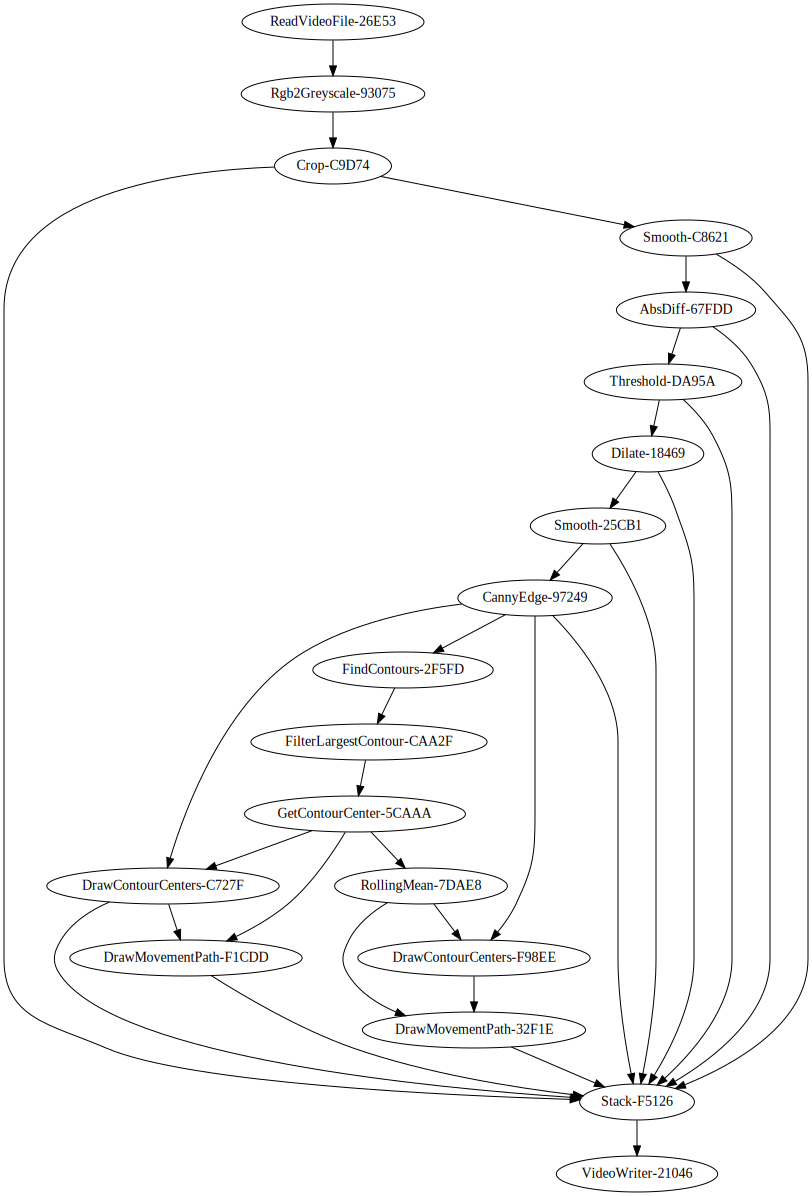

In [4]:
raw_video = vpl.generators.ReadVideoFile(video_path)
grey = vpl.functions.Rgb2Greyscale()(raw_video)
crop = vpl.functions.Crop(crop_pos, img_size)(grey)
smooth1 = vpl.functions.Smooth(101)(crop)
abs_diff = vpl.functions.AbsDiff()(smooth1)
threshold = vpl.functions.Threshold(32)(abs_diff)
dilate = vpl.functions.Dilate(150)(threshold)
# erode = vpl.functions.Erode(100)(dilate)
smooth2 = vpl.functions.Smooth(11)(dilate)
canny_edge = vpl.functions.CannyEdge(1, 200)(smooth2)
find_contours = vpl.functions.FindContours()(canny_edge)

largest_contours = vpl.functions.FilterLargestContour()(find_contours)
contour_center = vpl.functions.GetContourCenter()(largest_contours)

contour_center_drawn1 = vpl.functions.DrawContourCenters()([canny_edge, contour_center])
movement_path_drawn1 = vpl.functions.DrawMovementPath()([contour_center_drawn1, contour_center])

smoothed_center = vpl.functions.RollingMean(5)(contour_center)
contour_center_drawn2 = vpl.functions.DrawContourCenters()([canny_edge, smoothed_center])
movement_path_drawn2 = vpl.functions.DrawMovementPath()([contour_center_drawn2, smoothed_center])

stacked = vpl.functions.Stack(4, 3)([
    crop, 
    smooth1, 
    abs_diff, 
    threshold, 
    dilate, 
    smooth2, 
    canny_edge, 
    contour_center_drawn1, 
    movement_path_drawn1,
    movement_path_drawn2,
])
writer = vpl.actions.VideoWriter(add_suffix(video_path, "dev"), 
                                 30, 
                                 aggregate=True, 
                                 collect=False, 
                                 verbose=True)(stacked)

p = vpl.core.Pipeline(writer)
p.render_model()

In [5]:
# Run pipeline
_ = p()

Aggregating 0
Aggregating 1
Aggregating 2
Aggregating 3
Aggregating 4
Aggregating 5
Aggregating 6
Aggregating 7
Aggregating 8
Aggregating 9
Aggregating 10
Aggregating 11
Aggregating 12
Aggregating 13
Aggregating 14
Aggregating 15
Aggregating 16
Aggregating 17
Aggregating 18
Aggregating 19
Aggregating 20
Aggregating 21
Aggregating 22
Aggregating 23
Aggregating 24
Aggregating 25
Aggregating 26
Aggregating 27
Aggregating 28
Aggregating 29
Aggregating 30
Aggregating 31
Aggregating 32
Aggregating 33
Aggregating 34
Aggregating 35
Aggregating 36
Aggregating 37
Aggregating 38
Aggregating 39
Aggregating 40
Aggregating 41
Aggregating 42
Aggregating 43
Aggregating 44
Aggregating 45
Aggregating 46
Aggregating 47
Aggregating 48
Aggregating 49
Aggregating 50
Aggregating 51
Aggregating 52
Aggregating 53
Aggregating 54
Aggregating 55
Aggregating 56
Aggregating 57
Aggregating 58
Aggregating 59
Aggregating 60
Aggregating 61
Aggregating 62
Aggregating 63
Aggregating 64
Aggregating 65
Aggregating 66
Aggre